<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/Week4Anber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

print("--- Please upload your 'kaggle.json' file ---")
# This will prompt you to upload the kaggle.json file
files.upload()

--- Please upload your 'kaggle.json' file ---


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anberaziz","key":"51b0632a958ba40eb6e93d29e8ea615c"}'}

In [2]:
# -----------------------------------------------------------------------
# Part 1: Environment Setup & Data Collection (from Week 1)
# -----------------------------------------------------------------------
print("--- Part 1: Setting up Kaggle and Downloading Dataset ---")

# 1. Install Kaggle library
!pip install kaggle -q

# 2. Set up the Kaggle API token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token installed.")

# 3. Download the dataset
!kaggle datasets download -d aljarah/xAPI-Edu-Data

print("\nDataset downloaded. Unzipping...")

# 4. Unzip the dataset
!unzip -o xAPI-Edu-Data.zip
print("--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---")

--- Part 1: Setting up Kaggle and Downloading Dataset ---
Kaggle API token installed.
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 14.8MB/s]

Dataset downloaded. Unzipping...
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       
--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---


In [3]:
# -----------------------------------------------------------------------
# Part 2: Load Libraries and Clean Data (from Week 2)
# -----------------------------------------------------------------------
print("\n--- Part 2: Loading Libraries and Cleaning Data ---")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('xAPI-Edu-Data.csv')

# Create a copy for cleaning
df_cleaned = df.copy()

# Step 1: Standardize Column Names
df_cleaned.rename(columns={
    'gender': 'gender',
    'NationalITy': 'nationality',
    'PlaceofBirth': 'place_of_birth',
    'StageID': 'stage_id',
    'GradeID': 'grade_id',
    'SectionID': 'section_id',
    'Topic': 'topic',
    'Semester': 'semester',
    'Relation': 'relation',
    'raisedhands': 'raised_hands',
    'VisITedResources': 'visited_resources',
    'AnnouncementsView': 'announcements_view',
    'Discussion': 'discussion',
    'ParentAnsweringSurvey': 'parent_answering_survey',
    'ParentschoolSatisfaction': 'parent_school_satisfaction',
    'StudentAbsenceDays': 'student_absence_days',
    'Class': 'class_label'
}, inplace=True)

# Step 2: Handle Missing Values (None found in this dataset)
# Step 3: Remove Duplicates
dups_found = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Removed {dups_found} duplicate rows.")

# Step 4: Convert 'student_absence_days'
df_cleaned['student_absence_days'] = df_cleaned['student_absence_days'].map({'Under-7': 0, 'Above-7': 1})
print("Converted 'student_absence_days' to numerical (0/1).")

# Step 5: Treat outliers in 'raised_hands' (as a demo)
col_to_treat_demo = 'raised_hands'
Q1 = df_cleaned[col_to_treat_demo].quantile(0.25)
Q3 = df_cleaned[col_to_treat_demo].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned[col_to_treat_demo] = df_cleaned[col_to_treat_demo].clip(lower=lower_bound, upper=upper_bound)
print("Clipped outliers in 'raised_hands'.")

# Step 6: Encode binary features
df_cleaned['parent_answering_survey'] = df_cleaned['parent_answering_survey'].map({'Yes': 1, 'No': 0})
df_cleaned['parent_school_satisfaction'] = df_cleaned['parent_school_satisfaction'].map({'Good': 1, 'Bad': 0})
print("Encoded 'parent_answering_survey' and 'parent_school_satisfaction'.")
print("--- Data Cleaning Complete. Ready for Statistical Analysis. ---")


--- Part 2: Loading Libraries and Cleaning Data ---
Removed 2 duplicate rows.
Converted 'student_absence_days' to numerical (0/1).
Clipped outliers in 'raised_hands'.
Encoded 'parent_answering_survey' and 'parent_school_satisfaction'.
--- Data Cleaning Complete. Ready for Statistical Analysis. ---



--- Part 3: Week 4 Statistics & Probability ---

[Class Task: Descriptive Statistics for 'visited_resources']
  Mean:     54.97
  Median:   65.00
  Mode:     80.00
  Variance: 1091.32 (Std Deviation: 33.04)

[Assignment 4: Correlation Analysis]
Encoded target variable 'class_label' to 'class_label_encoded' (L=0, M=1, H=2).

Full Correlation Matrix (Class Task):
                            raised_hands  visited_resources  \
raised_hands                    1.000000           0.690635   
visited_resources               0.690635           1.000000   
announcements_view              0.642730           0.592948   
discussion                      0.337300           0.238790   
parent_answering_survey         0.313850           0.378720   
parent_school_satisfaction      0.293960           0.359566   
student_absence_days           -0.461696          -0.495716   
class_label_encoded             0.645007           0.674714   

                            announcements_view  discussion  \
raise

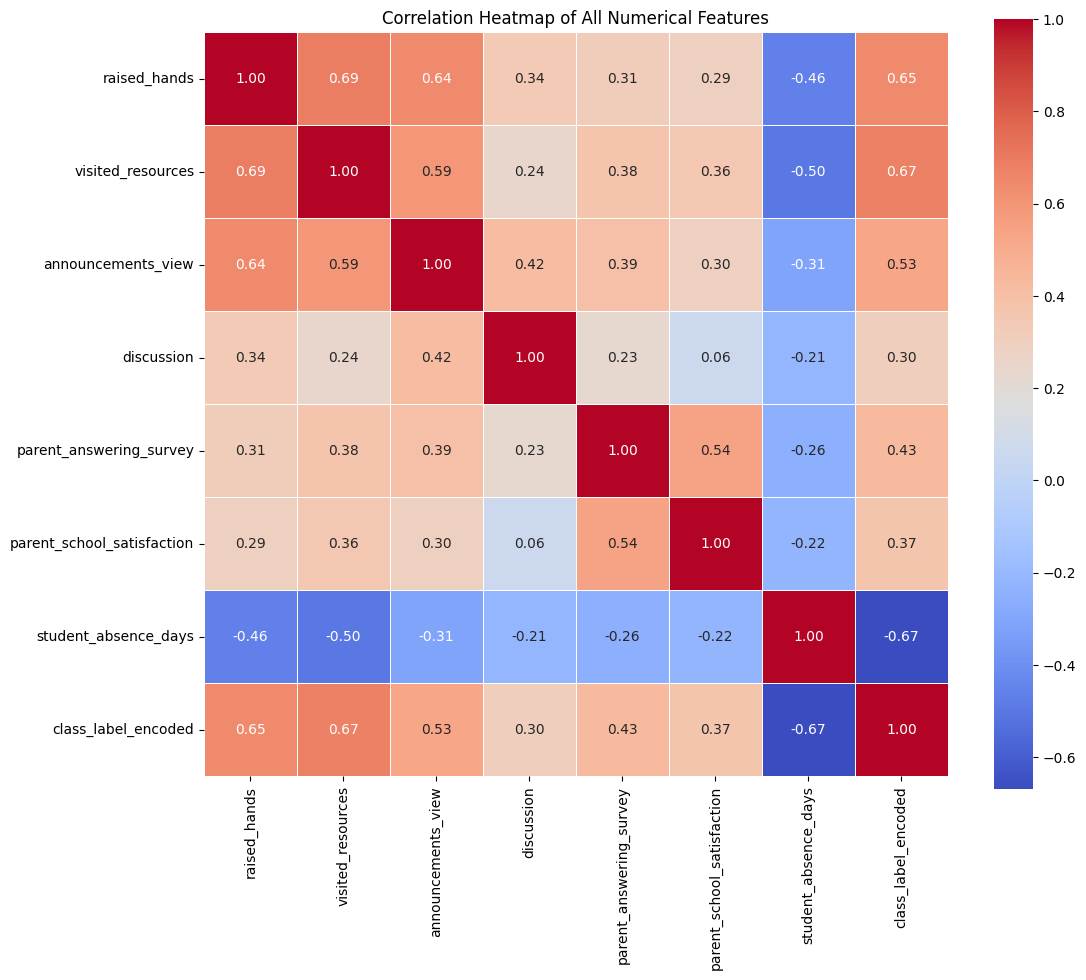


[Assignment 4 Report: Top 3 Features Related to Target Variable]
Features ranked by strength of correlation with Student Performance:
visited_resources             0.674714
student_absence_days          0.668995
raised_hands                  0.645007
announcements_view            0.525343
parent_answering_survey       0.431833
parent_school_satisfaction    0.371395
discussion                    0.303882
Name: class_label_encoded, dtype: float64

--- TOP 3 FEATURES ---
1. visited_resources: (Correlation: 0.6747)
2. student_absence_days: (Correlation: 0.6690)
3. raised_hands: (Correlation: 0.6450)

--- Week 4 Statistical Analysis Complete! ---


In [4]:
# Part 3: Week 4 - Statistics & Probability
# -----------------------------------------------------------------------
print("\n--- Part 3: Week 4 Statistics & Probability ---")

# --- Class Task: Calculate mean, median, mode, variance ---
print("\n[Class Task: Descriptive Statistics for 'visited_resources']")
feature = 'visited_resources'
mean_val = df_cleaned[feature].mean()
median_val = df_cleaned[feature].median()
mode_val = df_cleaned[feature].mode()[0] # Mode can return multiple, take first
variance_val = df_cleaned[feature].var()

print(f"  Mean:     {mean_val:.2f}")
print(f"  Median:   {median_val:.2f}")
print(f"  Mode:     {mode_val:.2f}")
print(f"  Variance: {variance_val:.2f} (Std Deviation: {np.sqrt(variance_val):.2f})")

# --- Assignment 4: Correlation Analysis ---
print("\n[Assignment 4: Correlation Analysis]")

# Step 1: Encode the target variable for correlation
# We must convert 'L', 'M', 'H' to numbers.
# We'll use ordinal encoding (0, 1, 2) because there is a logical order.
target_map = {'L': 0, 'M': 1, 'H': 2}
df_cleaned['class_label_encoded'] = df_cleaned['class_label'].map(target_map)
print("Encoded target variable 'class_label' to 'class_label_encoded' (L=0, M=1, H=2).")

# Step 2: Select only numerical columns for the correlation matrix
numerical_features = df_cleaned.select_dtypes(include=[np.number])

# Step 3: Calculate the correlation matrix
corr_matrix = numerical_features.corr()

print("\nFull Correlation Matrix (Class Task):")
print(corr_matrix)

# Step 4: Visualize the correlation matrix with a heatmap
print("\nVisualizing Correlation Matrix as a Heatmap...")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)
plt.title('Correlation Heatmap of All Numerical Features')
plt.show()

# Step 5: Identify Top 3 Features (Assignment 4 Report)
print("\n[Assignment 4 Report: Top 3 Features Related to Target Variable]")

# Isolate the correlations with our target variable
corr_target = corr_matrix['class_label_encoded']

# Get the absolute values (strength of correlation, positive or negative)
corr_target_abs = corr_target.abs()

# Sort them in descending order
top_features = corr_target_abs.sort_values(ascending=False)

# Remove the target variable itself (it will have a correlation of 1.0)
top_features = top_features.drop('class_label_encoded')

print("Features ranked by strength of correlation with Student Performance:")
print(top_features)

# Get the names of the top 3
top_3_names = top_features.head(3).index.tolist()
top_3_values = top_features.head(3).values

print(f"\n--- TOP 3 FEATURES ---")
print(f"1. {top_3_names[0]}: (Correlation: {top_3_values[0]:.4f})")
print(f"2. {top_3_names[1]}: (Correlation: {top_3_values[1]:.4f})")
print(f"3. {top_3_names[2]}: (Correlation: {top_3_values[2]:.4f})")
print("\n--- Week 4 Statistical Analysis Complete! ---")